In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("online.csv")

In [3]:
df.head()

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435


In [4]:
df.shape

(388, 16)

In [5]:
df.columns

Index(['Unnamed: 0', 'order_status', 'Monthly Income', 'latitude',
       'Marital Status', 'Gender', 'employment_status', 'Family size',
       'Reviews', 'Pin code', 'Age', 'longitude', 'Educational Qualifications',
       'Unnamed: 13', '9', '#@%'],
      dtype='object')

In [6]:
# misisng values
df.isnull().sum()

Unnamed: 0                      0
order_status                    0
Monthly Income                  0
latitude                        0
Marital Status                  0
Gender                          0
employment_status               0
Family size                    19
Reviews                         0
Pin code                        0
Age                            19
longitude                       0
Educational Qualifications      0
Unnamed: 13                     0
9                             388
#@%                           382
dtype: int64

In [7]:
# 9,  # @%, unnamed : 13,Unnamed: 0
# drop the columns
df.drop(columns=["9","#@%","Unnamed: 13", "Unnamed: 0"], inplace=True)

In [8]:
df.shape

(388, 12)

In [9]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                   19
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

<Axes: ylabel='Family size'>

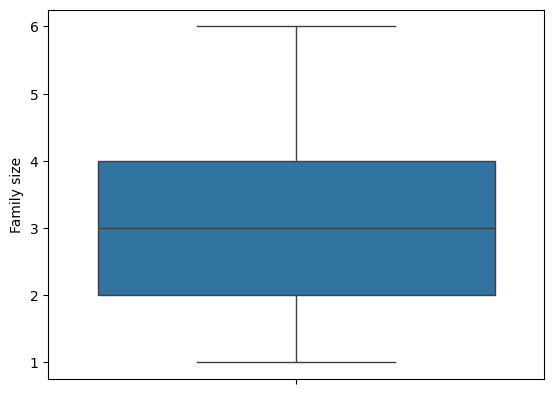

In [10]:
import seaborn as sns
sns.boxplot(df["Family size"])

In [11]:
# Mean imputation
family_mean=int(df["Family size"].mean())

In [12]:
# to fill the missing values in a column we use fillna function
df["Family size"].fillna(family_mean,inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_5180\2739253723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Family size"].fillna(family_mean,inplace=True)


In [13]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                    0
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

In [14]:
df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,NaN,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,NaN,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,NaN,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,NaN,77.5284,School


<Axes: ylabel='Age'>

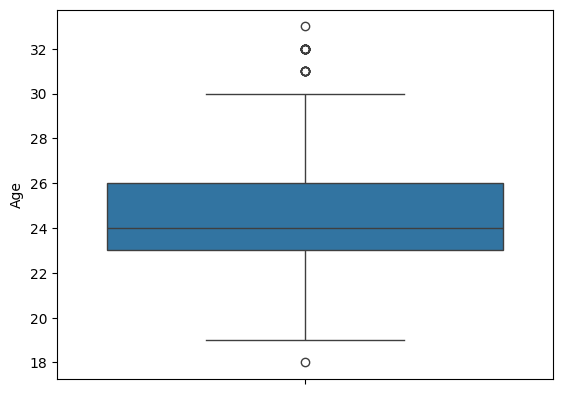

In [15]:
sns.boxplot(df["Age"])

In [16]:
age_median = int(df["Age"].median())

In [17]:
df["Age"].fillna(age_median,inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_5180\1941947347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_median,inplace=True)


In [18]:
df.isnull().sum()

order_status                  0
Monthly Income                0
latitude                      0
Marital Status                0
Gender                        0
employment_status             0
Family size                   0
Reviews                       0
Pin code                      0
Age                           0
longitude                     0
Educational Qualifications    0
dtype: int64

In [19]:
# lower limit =q1-1.5*IQR
# upper limit = q3 + 1.5*IQR
df.describe()


,latitude,Family size,Pin code,Age,longitude
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,12.972058,3.283505,560040.113402,24.634021,77.600160
std,0.044489,1.322450,31.399609,2.897932,0.051354
min,12.865200,1.000000,560001.000000,18.000000,77.484200
25%,12.936900,2.000000,560010.750000,23.000000,77.565275
50%,12.977000,3.000000,560033.500000,24.000000,77.592100
75%,12.997025,4.000000,560068.000000,26.000000,77.630900
max,13.102000,6.000000,560109.000000,33.000000,77.758200


In [20]:
q1=int(df.describe()["Age"]["25%"])

In [21]:
q3=int(df.describe()["Age"]["75%"])

In [22]:
IQR=q3-q1
print(IQR)

3


In [23]:
lower_limit =q1-1.5*IQR
upper_limit = q3 + 1.5*IQR

In [24]:
lower_limit

18.5

In [25]:
upper_limit

30.5

In [26]:
df[(df["Age"]>upper_limit) | (df["Age"]<lower_limit)].count()

order_status                  24
Monthly Income                24
latitude                      24
Marital Status                24
Gender                        24
employment_status             24
Family size                   24
Reviews                       24
Pin code                      24
Age                           24
longitude                     24
Educational Qualifications    24
dtype: int64

In [27]:
# These are my outliers
df[(df["Age"]>upper_limit) | (df["Age"]<lower_limit)]

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
16,Yes,25001 to 50000,12.9706,Married,Male,Employee,3.0,Positive,560075,32.0,77.6529,Graduate
26,Yes,10001 to 25000,12.9820,Married,Male,Self Employeed,3.0,Negative,560008,32.0,77.6256,School
31,No,More than 50000,13.0019,Married,Female,Employee,1.0,Positive,560003,32.0,77.5713,Graduate
33,No,No Income,13.0140,Married,Female,House wife,3.0,Positive,560012,32.0,77.5658,Uneducated
71,Yes,25001 to 50000,12.9706,Married,Male,Employee,3.0,Positive,560075,32.0,77.6529,Graduate
74,Yes,More than 50000,12.9037,Married,Male,Employee,5.0,Positive,560061,32.0,77.5376,Graduate
98,Yes,More than 50000,12.9369,Married,Male,Employee,6.0,Positive,560095,32.0,77.6407,Post Graduate
105,Yes,More than 50000,13.0487,Married,Male,Self Employeed,6.0,Positive,560024,31.0,77.5923,School
139,Yes,No Income,12.9889,Married,Female,House wife,5.0,Positive,560020,32.0,77.5741,School
147,Yes,No Income,12.9635,Single,Male,Student,5.0,Positive,560002,18.0,77.5821,Graduate


In [28]:
# removing the outliers(trimming)

df[(df["Age"]<upper_limit) & (df["Age"]>lower_limit)].count()

order_status                  364
Monthly Income                364
latitude                      364
Marital Status                364
Gender                        364
employment_status             364
Family size                   364
Reviews                       364
Pin code                      364
Age                           364
longitude                     364
Educational Qualifications    364
dtype: int64

In [29]:
new_df=df[(df["Age"]<upper_limit) & (df["Age"]>lower_limit)]

In [30]:
new_df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School


<Axes: ylabel='Age'>

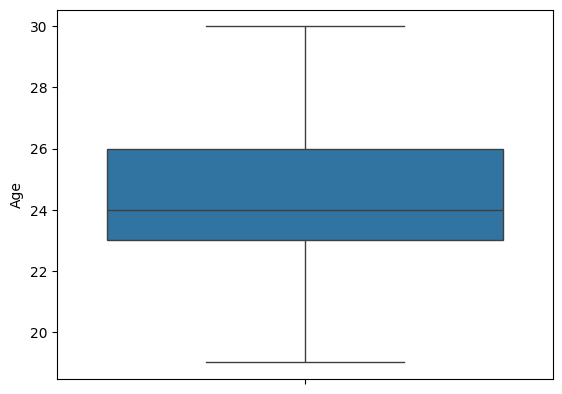

In [31]:
sns.boxplot(new_df["Age"])

In [32]:
df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School


<Axes: ylabel='Age'>

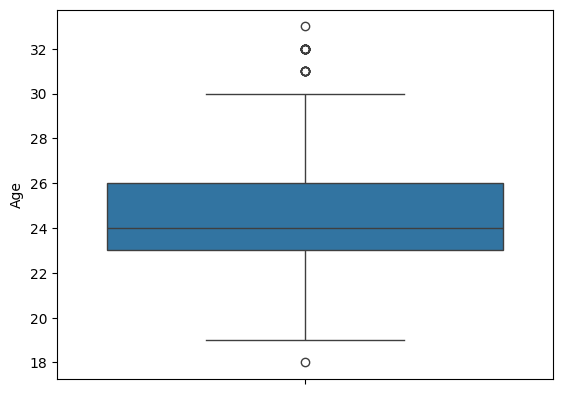

In [33]:
sns.boxplot(df["Age"])

In [34]:
# capping techniques
df["Age"].clip(lower_limit,upper_limit,inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_5180\2735311850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].clip(lower_limit,upper_limit,inplace=True)


<Axes: ylabel='Age'>

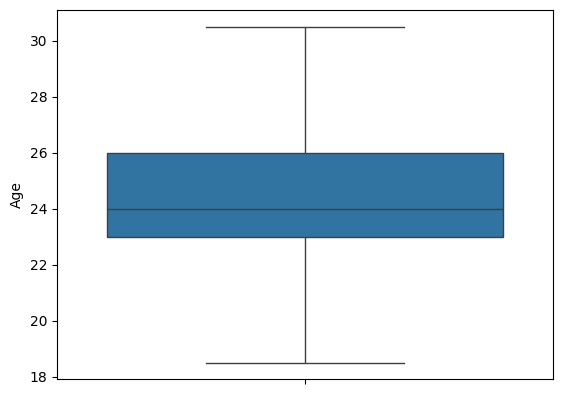

In [35]:
sns.boxplot(df["Age"])

In [36]:
df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School


In [37]:
df.isnull().sum()

order_status                  0
Monthly Income                0
latitude                      0
Marital Status                0
Gender                        0
employment_status             0
Family size                   0
Reviews                       0
Pin code                      0
Age                           0
longitude                     0
Educational Qualifications    0
dtype: int64

In [38]:
df.head(2)

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate


In [39]:
# martial status- nominal,
# Gender - Nominal, employment_status - Nominal
# Reviews - Ordinal, Monthly Income - ordinal
# Educational Qualifications - ordinal

# Target variable
# order_status - nominal

In [40]:
# Applying onehot encoding using pd.get_dummies function on nominal variables

df=pd.get_dummies(df,columns=["Gender","employment_status","Marital Status"],dtype="int64",drop_first=True)

In [41]:
df.head(2)

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,employment_status_House wife,employment_status_Self Employeed,employment_status_Student,Marital Status_Prefer not to say,Marital Status_Single
0,Yes,25001 to 50000,13.0262,5.0,Positive,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,No Income,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,1,0,0,1,0,1


In [42]:
# Applying ordinal encoding using map function from pandas
# Monthly Income
# Reviews
# Education Qualifications
df["Monthly Income"].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [43]:
d1 = {"No Income":1,"Below Rs.10000":2,"10001 to 25000":3,"25001 to 50000":4,"More than 50000":5}
df["Monthly Income"]=df["Monthly Income"].map(d1)

In [44]:
df.head(3)

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,employment_status_House wife,employment_status_Self Employeed,employment_status_Student,Marital Status_Prefer not to say,Marital Status_Single
0,Yes,4,13.0262,5.0,Positive,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,1,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,1,0,0,1,0,1
2,Yes,1,12.9770,3.0,Positive,560009,24.0,77.5773,Post Graduate,0,0,0,1,0,1


In [45]:
df["Reviews"].value_counts()

Reviews
Positive     317
Negative      71
Name: count, dtype: int64

In [46]:
d2 = {"Positive":1,"Negative":0}
df["Reviews"]=df["Reviews"].map(d2)

In [47]:
df.head()

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,employment_status_House wife,employment_status_Self Employeed,employment_status_Student,Marital Status_Prefer not to say,Marital Status_Single
0,Yes,4,13.0262,5.0,1.0,560045,28.0,77.6200,Post Graduate,1,0,0,0,0,0
1,Yes,1,12.9770,3.0,1.0,560009,24.0,77.5773,Post Graduate,1,0,0,1,0,1
2,Yes,1,12.9770,3.0,1.0,560009,24.0,77.5773,Post Graduate,0,0,0,1,0,1
3,Yes,1,13.0019,3.0,1.0,560003,24.0,77.5713,Post Graduate,0,0,0,1,0,1
4,Yes,5,13.0626,3.0,1.0,560015,24.0,77.5284,School,1,0,1,0,0,0


In [48]:
df["Educational Qualifications"].value_counts()

Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64

In [49]:
d3 = {"Uneducated":0, "School":1, "Graduate":2, "Post Graduate":3, "Ph.D":4}
df["Educational Qualifications"]=df["Educational Qualifications"].map(d3)

In [50]:
df.head()

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,employment_status_House wife,employment_status_Self Employeed,employment_status_Student,Marital Status_Prefer not to say,Marital Status_Single
0,Yes,4,13.0262,5.0,1.0,560045,28.0,77.6200,3,1,0,0,0,0,0
1,Yes,1,12.9770,3.0,1.0,560009,24.0,77.5773,3,1,0,0,1,0,1
2,Yes,1,12.9770,3.0,1.0,560009,24.0,77.5773,3,0,0,0,1,0,1
3,Yes,1,13.0019,3.0,1.0,560003,24.0,77.5713,3,0,0,0,1,0,1
4,Yes,5,13.0626,3.0,1.0,560015,24.0,77.5284,1,1,0,1,0,0,0


In [51]:
df["order_status"].value_counts()

order_status
Yes    301
No      87
Name: count, dtype: int64

In [52]:
d4 = {"Yes":1, "No":0}
df["order_status"]=df["order_status"].map(d4)

In [53]:
df.head()

,order_status,Monthly Income,latitude,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Gender_Male,employment_status_House wife,employment_status_Self Employeed,employment_status_Student,Marital Status_Prefer not to say,Marital Status_Single
0,1,4,13.0262,5.0,1.0,560045,28.0,77.6200,3,1,0,0,0,0,0
1,1,1,12.9770,3.0,1.0,560009,24.0,77.5773,3,1,0,0,1,0,1
2,1,1,12.9770,3.0,1.0,560009,24.0,77.5773,3,0,0,0,1,0,1
3,1,1,13.0019,3.0,1.0,560003,24.0,77.5713,3,0,0,0,1,0,1
4,1,5,13.0626,3.0,1.0,560015,24.0,77.5284,1,1,0,1,0,0,0


In [54]:
# feature scaling, sklearn -library
# Machine Learning
# Linear Regression
# Logistic Regression
# Decision Tree 
# Random Forest
# XGBOOST
# SVM
# KNN
# K-means clustering
# Gradio
# streamlit - deploy the model on the server(streamlit)
# fast api
# flask app

